## Initialization

In [1]:
# packages
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
import os
import shutil
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import string  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from tqdm import tnrange, tqdm_notebook
from itertools import combinations
import seaborn as sns
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.cross_decomposition import PLSRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
import math

In [2]:
# set directories
inputpath=r'/Users/nadhif/Library/CloudStorage/OneDrive-HandelshögskolaniStockholm/PhD/Fall 2023/Applied Empirical Economics/Problem Set/Task4/Raw/Data'
outputpath=r'/Users/nadhif/Library/CloudStorage/OneDrive-HandelshögskolaniStockholm/PhD/Fall 2023/Applied Empirical Economics/Problem Set/Task4/Analysis/Results'

## Data Input

In [3]:
# upload the raw dataset 
data1 = pd.read_csv(inputpath+'/growthdata92_02.csv',sep=",",
                  lineterminator='\r',
                  error_bad_lines=False)

data2 = pd.read_csv(inputpath+'/growthdata02_11.csv',sep=",",
                  lineterminator='\r',
                  error_bad_lines=False)

/var/folders/1q/w9k33ndn3r764dwmlxmm3z540000gn/T/ipykernel_47904/1614986813.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data1 = pd.read_csv(inputpath+'/growthdata92_02.csv',sep=",",
/var/folders/1q/w9k33ndn3r764dwmlxmm3z540000gn/T/ipykernel_47904/1614986813.py:6: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data2 = pd.read_csv(inputpath+'/growthdata02_11.csv',sep=",",


In [4]:
# drop NaNs
data1.dropna(inplace = True)
data2.dropna(inplace = True)


In [5]:
# drop unnecessary variables
data1 = data1.drop(["iso3", "Unnamed: 0"], axis=1)
data2 = data2.drop(["iso3", "Unnamed: 0"], axis=1)

In [6]:
# specify in\dependent variables
y = data1['growth']
X = data1.drop(["growth"], axis=1)

X_test = data2.drop('growth',axis = 1)
y_test = data2['growth']


## Susbet Selection

## Lasso 

In [8]:
list_alpha = np.linspace(0,0.02,25)

X = data1.drop('growth',axis = 1)
y = data1['growth']
scaler = StandardScaler()
X = scaler.fit_transform(X)
# Now, X is standardised
coeff_matrix = {}

for alpha in list_alpha:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X,y)
    coeff_matrix[alpha] = list(lasso.coef_)
    
tmp = pd.DataFrame(coeff_matrix).T
tmp.index = list_alpha
tmp.head()



/Users/nadhif/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/nadhif/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/nadhif/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.911e-02, tolerance: 9.916e-06 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0.000000,-0.027683,0.000728,-0.001285,-0.00066,-0.003387,-0.00015,-0.009761,-0.006340,-0.000396,-0.011573,...,-0.001679,0.002668,0.000868,-0.006818,-0.004033,0.003042,0.014343,0.004829,0.000631,-0.001946
0.000833,-0.015461,0.000000,-0.001163,0.00000,-0.003636,0.00000,-0.010019,-0.005483,-0.000000,-0.007060,...,0.000000,0.001556,0.000000,-0.006233,0.000000,0.001552,0.007106,0.002730,0.000000,0.000000
0.001667,-0.004120,0.000000,-0.000377,0.00000,-0.003540,0.00000,-0.010642,-0.004520,-0.000000,-0.000978,...,0.002135,0.000070,0.000000,-0.005075,0.000000,0.001301,0.004112,0.001046,0.000000,0.000000
0.002500,-0.000000,0.000000,-0.000000,0.00000,-0.003016,0.00000,-0.010795,-0.003798,-0.000000,-0.000000,...,0.000000,0.001934,0.000000,-0.004570,0.000000,0.001198,0.002579,0.000000,0.000000,0.000000
0.003333,-0.000000,0.000000,-0.000000,0.00000,-0.001917,0.00000,-0.010330,-0.003266,-0.000000,-0.000000,...,0.000000,0.001331,0.000000,-0.003983,0.000000,0.001010,0.002612,0.000000,0.000000,0.000000


In [9]:
print(list_alpha)

[0.         0.00083333 0.00166667 0.0025     0.00333333 0.00416667
 0.005      0.00583333 0.00666667 0.0075     0.00833333 0.00916667
 0.01       0.01083333 0.01166667 0.0125     0.01333333 0.01416667
 0.015      0.01583333 0.01666667 0.0175     0.01833333 0.01916667
 0.02      ]


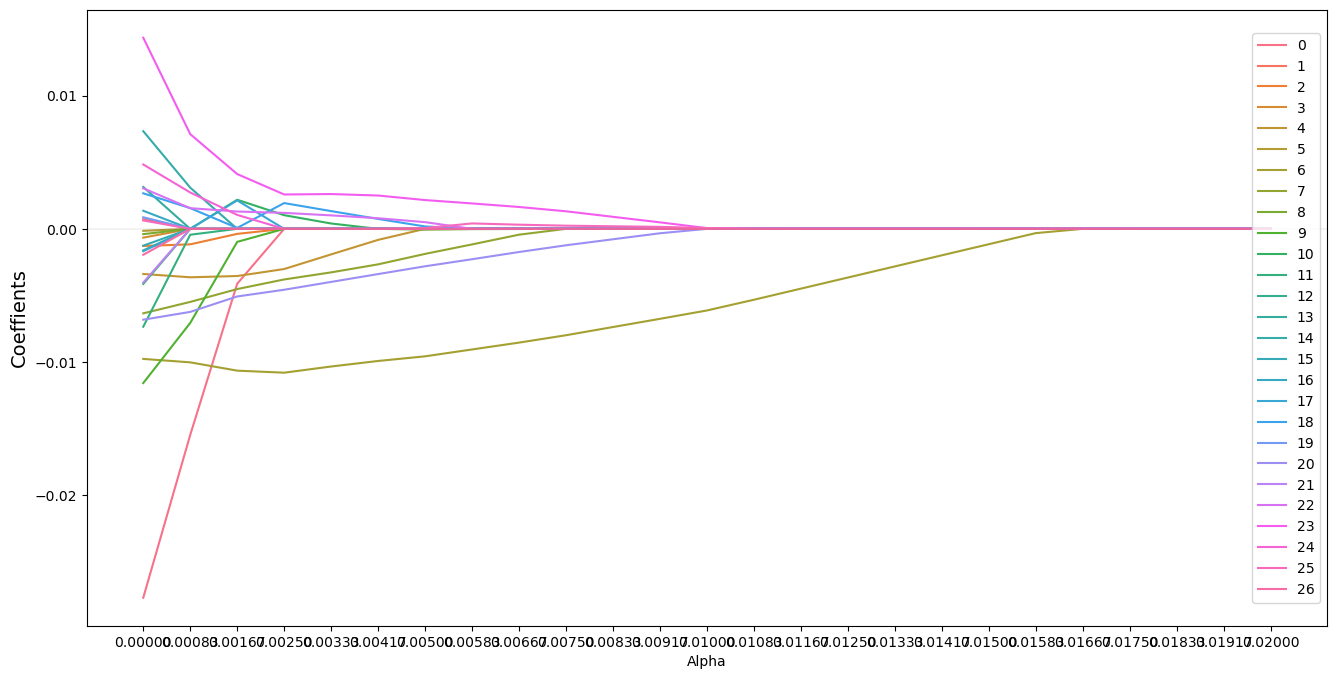

In [10]:
plt.figure(figsize = (16,8))
sns.lineplot(data = tmp, dashes=False)
plt.axhline(y = 0,linestyle = 'dashed',lw = 0.1,color = 'black')
#plt.xscale('log')
plt.xticks(list_alpha)
plt.ylabel('Coeffients',fontsize = 14)
plt.xlabel('Alpha')
plt.legend(loc='right')

In [11]:
#for a small value of aplpha, the coeff are - 
print(coeff_matrix[list_alpha[8]])

[0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.008537764764901156, -0.000437486680424872, -1.2064505179438087e-05, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0017384236140121976, 0.0, 0.0, 0.0016409799224609536, 0.0, 0.00031226769247260505, 0.0]


In [12]:
# for a large value of alpha, the coeff are - 
print(coeff_matrix[list_alpha[20]])

[0.0, 0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


(0.0, 0.02)

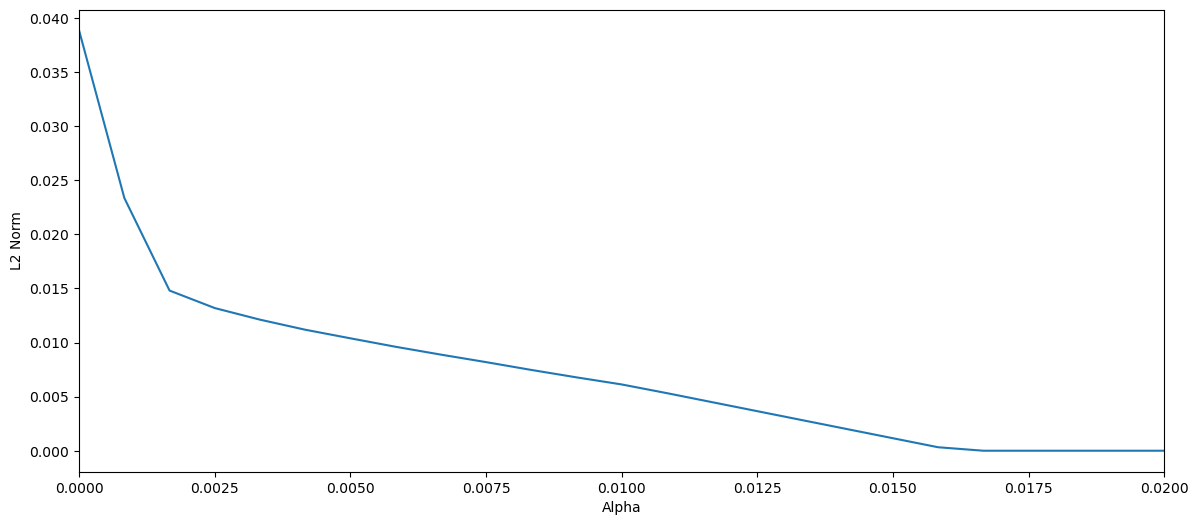

In [13]:
list_l2_norm = []
for alpha in list_alpha:
    list_l2_norm.append(np.linalg.norm(coeff_matrix[alpha]))
plt.figure(figsize = (14,6))
plt.plot(list_alpha,list_l2_norm)
plt.xlabel('Alpha')
plt.ylabel('L2 Norm')
plt.xlim(0,0.02)

In [14]:
# cross validation for this model 
parameters = {'alpha':list_alpha}
lasso = Lasso()
lasso = GridSearchCV(lasso,parameters)
lasso.fit(data1.drop('growth',axis = 1),data1['growth'])


/Users/nadhif/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/nadhif/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/nadhif/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.152e-02, tolerance: 8.679e-06 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': array([0.        , 0.00083333, 0.00166667, 0.0025    , 0.00333333,
       0.00416667, 0.005     , 0.00583333, 0.00666667, 0.0075    ,
       0.00833333, 0.00916667, 0.01      , 0.01083333, 0.01166667,
       0.0125    , 0.01333333, 0.01416667, 0.015     , 0.01583333,
       0.01666667, 0.0175    , 0.01833333, 0.01916667, 0.02      ])})

In [15]:
best_lasso = lasso.best_estimator_
best_lasso

Lasso(alpha=0.0008333333333333334)

In [16]:
best_lasso.coef_

array([-1.55376582e-02,  0.00000000e+00, -1.03163342e-03,  0.00000000e+00,
       -3.44473773e-03,  0.00000000e+00, -7.53798667e-03, -5.29223136e-03,
       -0.00000000e+00, -6.57345092e-03,  0.00000000e+00, -6.77721049e-04,
       -0.00000000e+00, -0.00000000e+00,  3.04486593e-03, -2.50008481e-06,
        0.00000000e+00,  0.00000000e+00,  1.29926395e-03,  0.00000000e+00,
       -6.17462784e-03,  0.00000000e+00,  1.47888191e-03,  6.77881811e-03,
        2.64832250e-03,  0.00000000e+00,  0.00000000e+00])

In [17]:
pd.DataFrame({'Coefficients':list(best_lasso.coef_)},index = list(data1.drop('growth',axis = 1).columns))

,Coefficients
ln_y,-0.015538
hc,0.000000
gvmnt_c,-0.001032
gcf,0.000000
ext_bal,-0.003445
trade,0.000000
inflation,-0.007538
fem_emp,-0.005292
tot_emp,-0.000000
inf_mort,-0.006573


## Ridge Regression

In [18]:
list_alpha = np.linspace(0,250,100)

X = data1.drop('growth',axis = 1)
y = data1['growth']

scaler = StandardScaler()
X = scaler.fit_transform(X)
# Now, X is standardised
coeff_matrix = {}

for alpha in list_alpha:
    ridge= Ridge(alpha=alpha)
    ridge.fit(X,y)
    coeff_matrix[alpha] = list(ridge.coef_)
tmp = pd.DataFrame(coeff_matrix).T
tmp.index = list_alpha
tmp

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0.000000,-0.027862,0.000675,-0.001235,-0.000642,-0.003255,-0.000149,-0.009866,-0.006058,-0.000639,-0.011335,...,-0.035287,0.036297,0.000960,-0.006717,-0.004022,0.002984,0.014311,0.004896,0.000549,-0.001972
2.525253,-0.021678,0.000370,-0.001870,-0.000431,-0.004060,-0.000119,-0.009778,-0.004363,-0.001738,-0.007980,...,0.000729,0.000779,0.000229,-0.007027,-0.002416,0.002625,0.009096,0.004243,0.001484,-0.000270
5.050505,-0.018064,0.000140,-0.002109,-0.000360,-0.004400,-0.000067,-0.009703,-0.003826,-0.002007,-0.006186,...,0.000888,0.000885,-0.000015,-0.006963,-0.001597,0.002462,0.006947,0.003803,0.001788,0.000311
7.575758,-0.015591,-0.000028,-0.002227,-0.000317,-0.004579,-0.000028,-0.009601,-0.003587,-0.002104,-0.005124,...,0.000980,0.000964,-0.000085,-0.006800,-0.001084,0.002373,0.005770,0.003468,0.001911,0.000591
10.101010,-0.013772,-0.000158,-0.002284,-0.000285,-0.004667,0.000004,-0.009486,-0.003455,-0.002150,-0.004417,...,0.001045,0.001025,-0.000076,-0.006603,-0.000730,0.002313,0.005026,0.003205,0.001964,0.000751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239.898990,-0.001330,-0.000551,-0.000786,-0.000102,-0.001842,0.000272,-0.004078,-0.001813,-0.001490,-0.000625,...,0.001181,0.001177,0.001040,-0.002158,0.000891,0.001249,0.001392,0.001044,0.001361,0.001085
242.424242,-0.001316,-0.000547,-0.000779,-0.000102,-0.001828,0.000272,-0.004053,-0.001803,-0.001483,-0.000621,...,0.001177,0.001173,0.001038,-0.002145,0.000889,0.001244,0.001386,0.001040,0.001356,0.001082
244.949495,-0.001301,-0.000544,-0.000773,-0.000102,-0.001815,0.000271,-0.004029,-0.001794,-0.001476,-0.000618,...,0.001173,0.001170,0.001035,-0.002133,0.000888,0.001240,0.001381,0.001036,0.001351,0.001079
247.474747,-0.001287,-0.000540,-0.000766,-0.000102,-0.001802,0.000271,-0.004005,-0.001785,-0.001470,-0.000615,...,0.001169,0.001166,0.001033,-0.002121,0.000886,0.001235,0.001375,0.001032,0.001346,0.001077


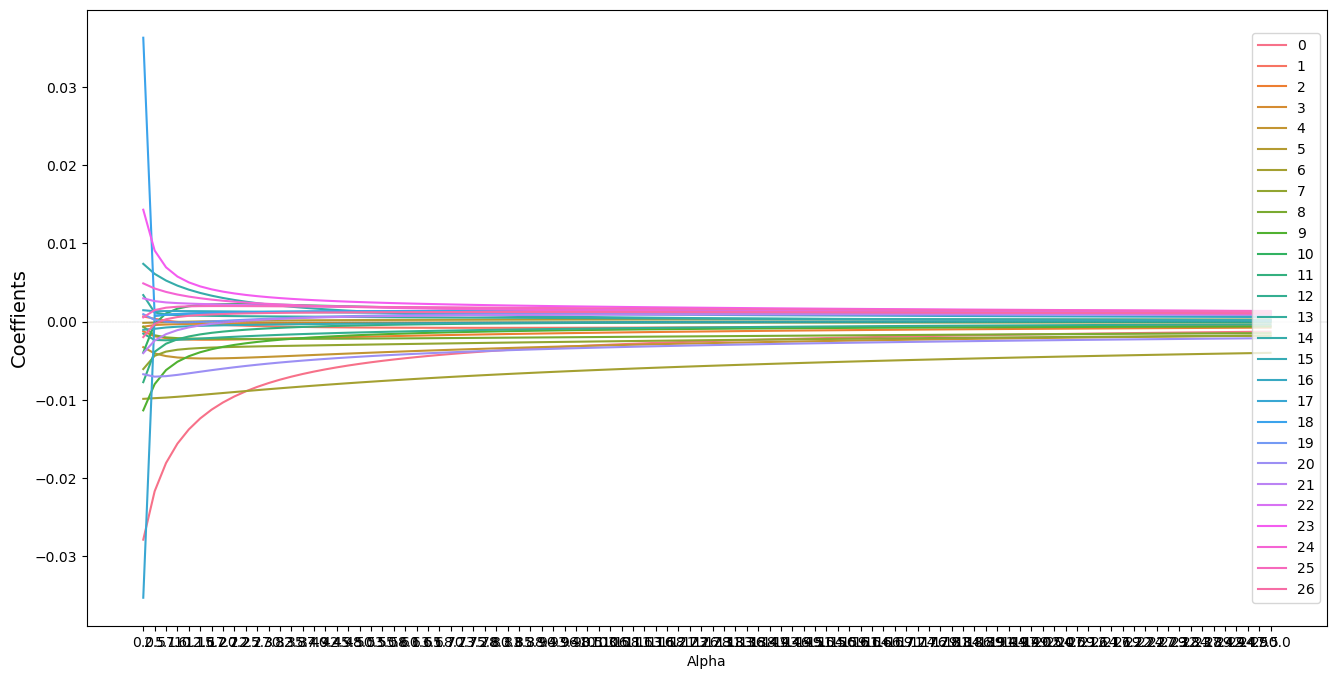

In [19]:
plt.figure(figsize = (16,8))
sns.lineplot(data = tmp, dashes=False)
plt.axhline(y = 0,linestyle = 'dashed',lw = 0.1,color = 'black')
#plt.xscale('log')
plt.xticks(list_alpha)
plt.ylabel('Coeffients',fontsize = 14)
plt.xlabel('Alpha')
plt.legend(loc='right')

In [20]:
#for a small value of aplpha, the coeff are - 
print(coeff_matrix[list_alpha[8]])

[-0.009558401831607959, -0.00047038487185252547, -0.0022799372591639326, -0.00020512902113297958, -0.004645511341442097, 9.238548340364955e-05, -0.008993926328793596, -0.003225446111716746, -0.002202836603407961, -0.0029692532267511767, 0.002252716444356557, -0.0011377325993193776, -0.0019301079665808856, 0.0007106151313937541, 0.0027758583461853256, -0.000438319840303835, 0.0013016160371460677, 0.0011963198458901632, 0.001176791405820266, 0.00017865057300395703, -0.005828213076773396, 1.9292762979898717e-05, 0.0021563297173410397, 0.0036084954931077198, 0.0025539534480348665, 0.0019945009746687543, 0.0010211829902083188]


In [21]:
# for a large value of alpha, the coeff are - 
print(coeff_matrix[list_alpha[20]])

[-0.005189977433254726, -0.0007533218187865338, -0.0019022992860664467, -0.0001205261760465405, -0.003962125608472436, 0.00021197292384800295, -0.007671664981550944, -0.002921721211820183, -0.002156074055938753, -0.0016603710021845018, 0.0018968855187496666, -0.0004438286314373246, -0.00133967192918837, 0.0005907546139300963, 0.0012707341248215274, -0.00023675818630389494, 0.001145410518092434, 0.0013521992048787079, 0.001340603188829662, 0.0007690135786500026, -0.004396283553922839, 0.0006785848966261799, 0.0018798375991340944, 0.002458985216596751, 0.0018221277449456995, 0.0018910610310885671, 0.0012064331008412612]


(0.0, 250.0)

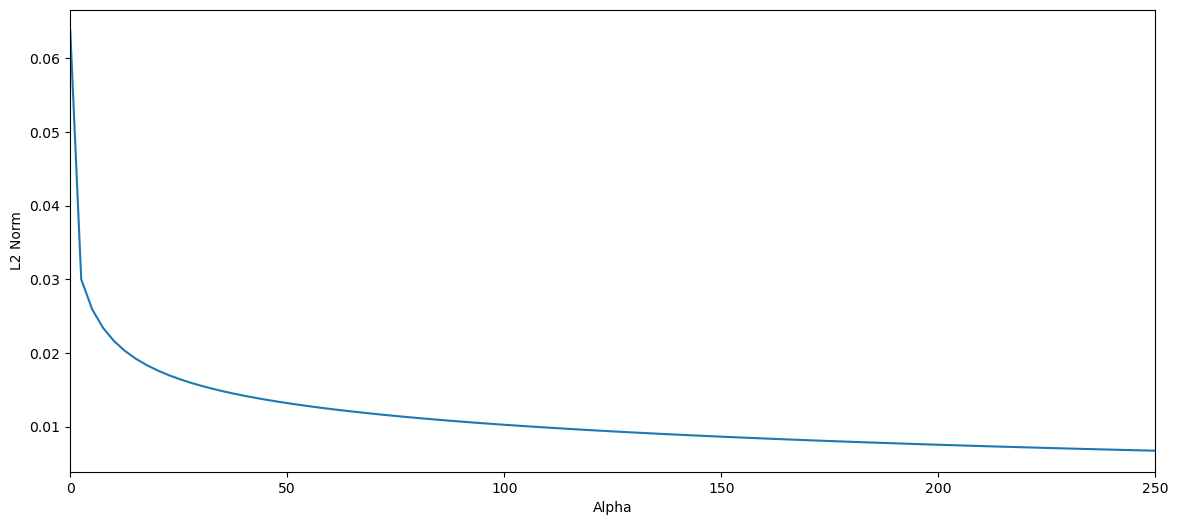

In [22]:
list_l2_norm = []
for alpha in list_alpha:
    list_l2_norm.append(np.linalg.norm(coeff_matrix[alpha]))
plt.figure(figsize = (14,6))
plt.plot(list_alpha,list_l2_norm)
plt.xlabel('Alpha')
plt.ylabel('L2 Norm')
plt.xlim(0,250)

In [23]:
# cross validation for this model
parameters = {'alpha':list_alpha}
ridge = Ridge()
ridge = GridSearchCV(ridge,parameters)
ridge.fit(data1.drop('growth',axis = 1),data1['growth'])


GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': array([  0.        ,   2.52525253,   5.05050505,   7.57575758,
        10.1010101 ,  12.62626263,  15.15151515,  17.67676768,
        20.2020202 ,  22.72727273,  25.25252525,  27.77777778,
        30.3030303 ,  32.82828283,  35.35353535,  37.87878788,
        40.4040404 ,  42.92929293,  45.45454545,  47.97979798,
        50.50505051,  53.03030303,  55.55555556,  58.08080808,
        60.60606061,  63.13131...
       181.81818182, 184.34343434, 186.86868687, 189.39393939,
       191.91919192, 194.44444444, 196.96969697, 199.49494949,
       202.02020202, 204.54545455, 207.07070707, 209.5959596 ,
       212.12121212, 214.64646465, 217.17171717, 219.6969697 ,
       222.22222222, 224.74747475, 227.27272727, 229.7979798 ,
       232.32323232, 234.84848485, 237.37373737, 239.8989899 ,
       242.42424242, 244.94949495, 247.47474747, 250.        ])})

In [24]:
best_ridge = ridge.best_estimator_
best_ridge

Ridge(alpha=108.58585858585857)

In [25]:
best_ridge.coef_

array([-0.00264865, -0.00050114, -0.00119743,  0.00012422, -0.00286567,
        0.0003217 , -0.00591789, -0.00231665, -0.00188722, -0.00100461,
        0.00131679, -0.00033218, -0.00064153,  0.00025656,  0.00057607,
       -0.00021957,  0.00074907,  0.00113214,  0.00112672,  0.00096184,
       -0.0030404 ,  0.00073252,  0.00143924,  0.00163261,  0.00124142,
        0.00141718,  0.00104148])

In [26]:
pd.DataFrame({'Coefficients':list(best_ridge.coef_)},index = list(data1.drop('growth',axis = 1).columns))

,Coefficients
ln_y,-0.002649
hc,-0.000501
gvmnt_c,-0.001197
gcf,0.000124
ext_bal,-0.002866
trade,0.000322
inflation,-0.005918
fem_emp,-0.002317
tot_emp,-0.001887
inf_mort,-0.001005


## Principal Component 

In [27]:
X = data1.drop('growth',axis = 1)
y = data1['growth']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#applying pca
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [28]:
print('Shape of data returned by pca is ',X_pca.shape)

Shape of data returned by pca is  (112, 27)


In [29]:
print('Total number of components are - ',len(pca.components_))

Total number of components are -  27


In [30]:
pca.explained_variance_ratio_*100

array([4.43876486e+01, 9.25776357e+00, 8.08697084e+00, 6.41092405e+00,
       5.50475865e+00, 4.62017940e+00, 3.49259343e+00, 3.02347239e+00,
       2.84599681e+00, 2.42013319e+00, 1.84799414e+00, 1.50908339e+00,
       1.24643965e+00, 1.04943853e+00, 8.45645650e-01, 7.15725017e-01,
       6.48597034e-01, 5.07169311e-01, 3.83148896e-01, 3.12009831e-01,
       2.86085367e-01, 1.95004799e-01, 1.29732532e-01, 1.18607425e-01,
       1.11340093e-01, 4.33959053e-02, 1.41498262e-04])

In [31]:
np.round(pca.explained_variance_ratio_*100,1)

array([44.4,  9.3,  8.1,  6.4,  5.5,  4.6,  3.5,  3. ,  2.8,  2.4,  1.8,
        1.5,  1.2,  1. ,  0.8,  0.7,  0.6,  0.5,  0.4,  0.3,  0.3,  0.2,
        0.1,  0.1,  0.1,  0. ,  0. ])

In [32]:
def pcr(X,y):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    num_components = X.shape[1]
    scores = []
    variability_explained = []
    
    for n_component in range(1,num_components+1):
        pca = PCA(n_components=n_component)
        X_pca = pca.fit_transform(X_scaled)
        
        lr = LinearRegression()
        scores.append(-np.mean(cross_val_score(lr,X_pca,y,cv = 10,scoring = 'neg_mean_squared_error')))
        variability_explained.append(np.sum(np.round(pca.explained_variance_ratio_*100,1)))
        
    return scores,variability_explained    



Text(0.5, 1.0, '% explained by num of components')

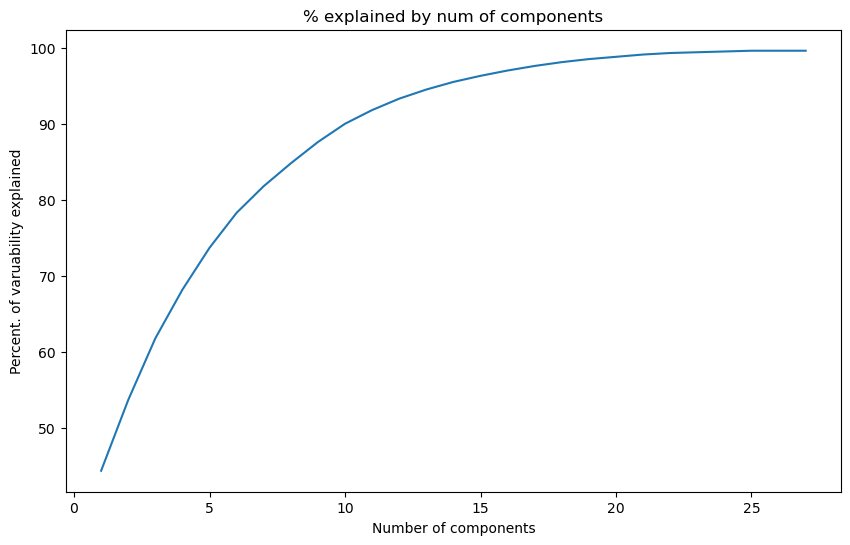

In [33]:
scores,var_explained = pcr(X,y) 
num_components = np.arange(1,X.shape[1]+1)
# Lets see the variability explained as function of the num_of_components
plt.figure(figsize = (10,6))
plt.plot(num_components,var_explained)
plt.xlabel('Number of components')
plt.ylabel('Percent. of varuability explained')
plt.title('% explained by num of components')

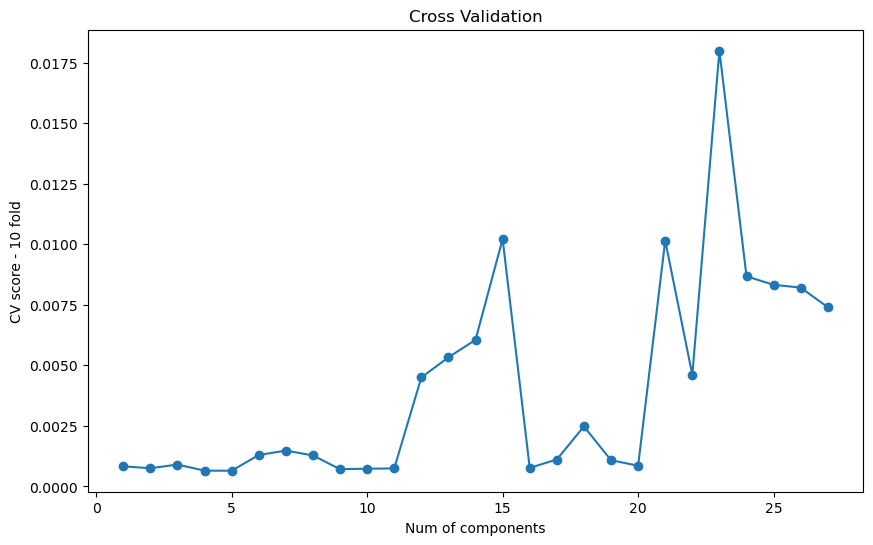

In [34]:
plt.figure(figsize = (10,6))
plt.plot(num_components,scores,marker = 'o')
plt.xlabel('Num of components')
plt.ylabel('CV score - 10 fold')
plt.title('Cross Validation')
plt.xticks = num_components

mean growth  

In [35]:
print(y_test)
actual = y.mean()
actual = [actual] * 112
predicted = y_test
mse = np.square(np.subtract(actual,predicted)).mean()  
rmse = math.sqrt(mse) 

0      0.051918
1      0.058311
2      0.057047
3      0.016547
4      0.014647
         ...   
107    0.004636
108    0.067158
109    0.068969
110    0.066528
111    0.033242
Name: growth, Length: 112, dtype: float64


kitchen sink 

In [36]:
X = data1.drop('growth',axis = 1)
y = data1['growth']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = LinearRegression()
model.fit(X, y)
print(model.coef_)
print(model.intercept_)
pd.DataFrame(model.coef_, X.columns, columns = ['Coeff'])

[-0.02873514  0.00068535 -0.00115934 -0.00053459 -0.00300548 -0.00016056
 -0.00714093 -0.00593114 -0.00063435 -0.01062861 -0.0040451  -0.00748475
 -0.00162247  0.00336141  0.00736739 -0.00096235  0.00138114 -0.02507475
  0.0257956   0.00096729 -0.0067144  -0.00402562  0.00304574  0.01444364
  0.00490905  0.00054935 -0.00198218]
0.0209040519772235


,Coeff
ln_y,-0.028735
hc,0.000685
gvmnt_c,-0.001159
gcf,-0.000535
ext_bal,-0.003005
trade,-0.000161
inflation,-0.007141
fem_emp,-0.005931
tot_emp,-0.000634
inf_mort,-0.010629


## RMSE Model Comparison

In [37]:
X_test = data2.drop('growth',axis = 1)
y_test = data2['growth']

scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)

print(X_test)

[[-0.22736046  0.88799424 -0.88988722 ... -0.51493196 -1.03201291
  -0.91823541]
 [ 0.30990383  0.49122543 -0.68303649 ... -1.27577826 -0.92708442
  -0.60116278]
 [-0.53281453  1.01170597 -1.1205809  ... -0.22988931 -0.48625764
  -0.72673558]
 ...
 [-0.87722834 -0.8438256  -1.9435028  ... -1.04598593 -0.67105636
  -0.6407148 ]
 [-1.25702199 -1.80602835 -0.17205018 ... -1.1472161  -1.62907858
  -1.00571407]
 [ 0.21321583  0.16190836  0.59558751 ...  0.46009309 -0.0579378
   0.23643293]]


In [38]:
# predictions for all models 

#predictions1 = mean.predict(X_test)

predictions2 = model.predict(X_test)

predictions3 = best_lasso.predict(X_test)

predictions4 = best_ridge.predict(X_test)

X = pca.fit_transform(X)
X_test = pca.transform(X_test)[:,0:5]
lm = LinearRegression()
pcr = lm.fit(X[:,0:5], y)
predictions5 = pcr.predict(X_test)



/Users/nadhif/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/nadhif/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
/Users/nadhif/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
/Users/nadhif/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [39]:
# RMSE for all models 
rmse

0.02836891063893041

In [40]:
np.sqrt(metrics.mean_squared_error(y_test, predictions2))

0.039109277094770536

In [41]:
np.sqrt(metrics.mean_squared_error(y_test, predictions3))


0.034378609982782644

In [42]:
np.sqrt(metrics.mean_squared_error(y_test, predictions4))


0.03394713454752962

In [43]:
np.sqrt(metrics.mean_squared_error(y_test, predictions5))

0.036131067725541324